# Regression In-Depth

## Prelude

In [6]:
import pandas as pd

df_raw = pd.read_feather('tmp/df_raw_curated')
df_raw

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,YEAR,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,...,DEP_DELAY,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,1.0,1.0,3.0,7.0,2016,F9,694.0,1129202.0,30325.0,"Denver, CO",...,-1.0,1807.0,8.0,1820.0,1815.0,-5.0,115.0,111.0,87.0,692.0
1,1.0,1.0,3.0,7.0,2016,F9,809.0,1402702.0,34027.0,"West Palm Beach/Palm Beach, FL",...,44.0,940.0,8.0,929.0,948.0,19.0,269.0,244.0,224.0,1679.0
2,1.0,1.0,3.0,7.0,2016,F9,907.0,1535602.0,35356.0,"Trenton, NJ",...,13.0,2006.0,7.0,2015.0,2013.0,-2.0,90.0,75.0,60.0,373.0
3,1.0,1.0,3.0,7.0,2016,F9,908.0,1449202.0,34492.0,"Raleigh/Durham, NC",...,-1.0,2208.0,7.0,2220.0,2215.0,-5.0,85.0,81.0,57.0,373.0
4,1.0,1.0,3.0,7.0,2016,F9,915.0,1535602.0,35356.0,"Trenton, NJ",...,2.0,1349.0,51.0,1420.0,1440.0,20.0,150.0,168.0,107.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856056,4.0,12.0,30.0,5.0,2016,DL,2034.0,1169704.0,32467.0,"Fort Lauderdale, FL",...,0.0,705.0,6.0,716.0,711.0,-5.0,111.0,106.0,88.0,581.0
1856057,4.0,12.0,30.0,5.0,2016,DL,2035.0,1039705.0,30397.0,"Atlanta, GA",...,-1.0,1442.0,7.0,1446.0,1449.0,3.0,124.0,128.0,105.0,669.0
1856058,4.0,12.0,30.0,5.0,2016,DL,2035.0,1334205.0,33342.0,"Milwaukee, WI",...,3.0,1812.0,4.0,1845.0,1816.0,-29.0,137.0,105.0,89.0,669.0
1856059,4.0,12.0,30.0,5.0,2016,DL,2036.0,1039705.0,30397.0,"Atlanta, GA",...,2.0,1254.0,5.0,1302.0,1259.0,-3.0,107.0,102.0,71.0,515.0


## Feature Selection ([reference](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b))

There are about three (3) methodologies to experiement:

1. Filter Method
2. Wrapper Method
3. Embedded Method

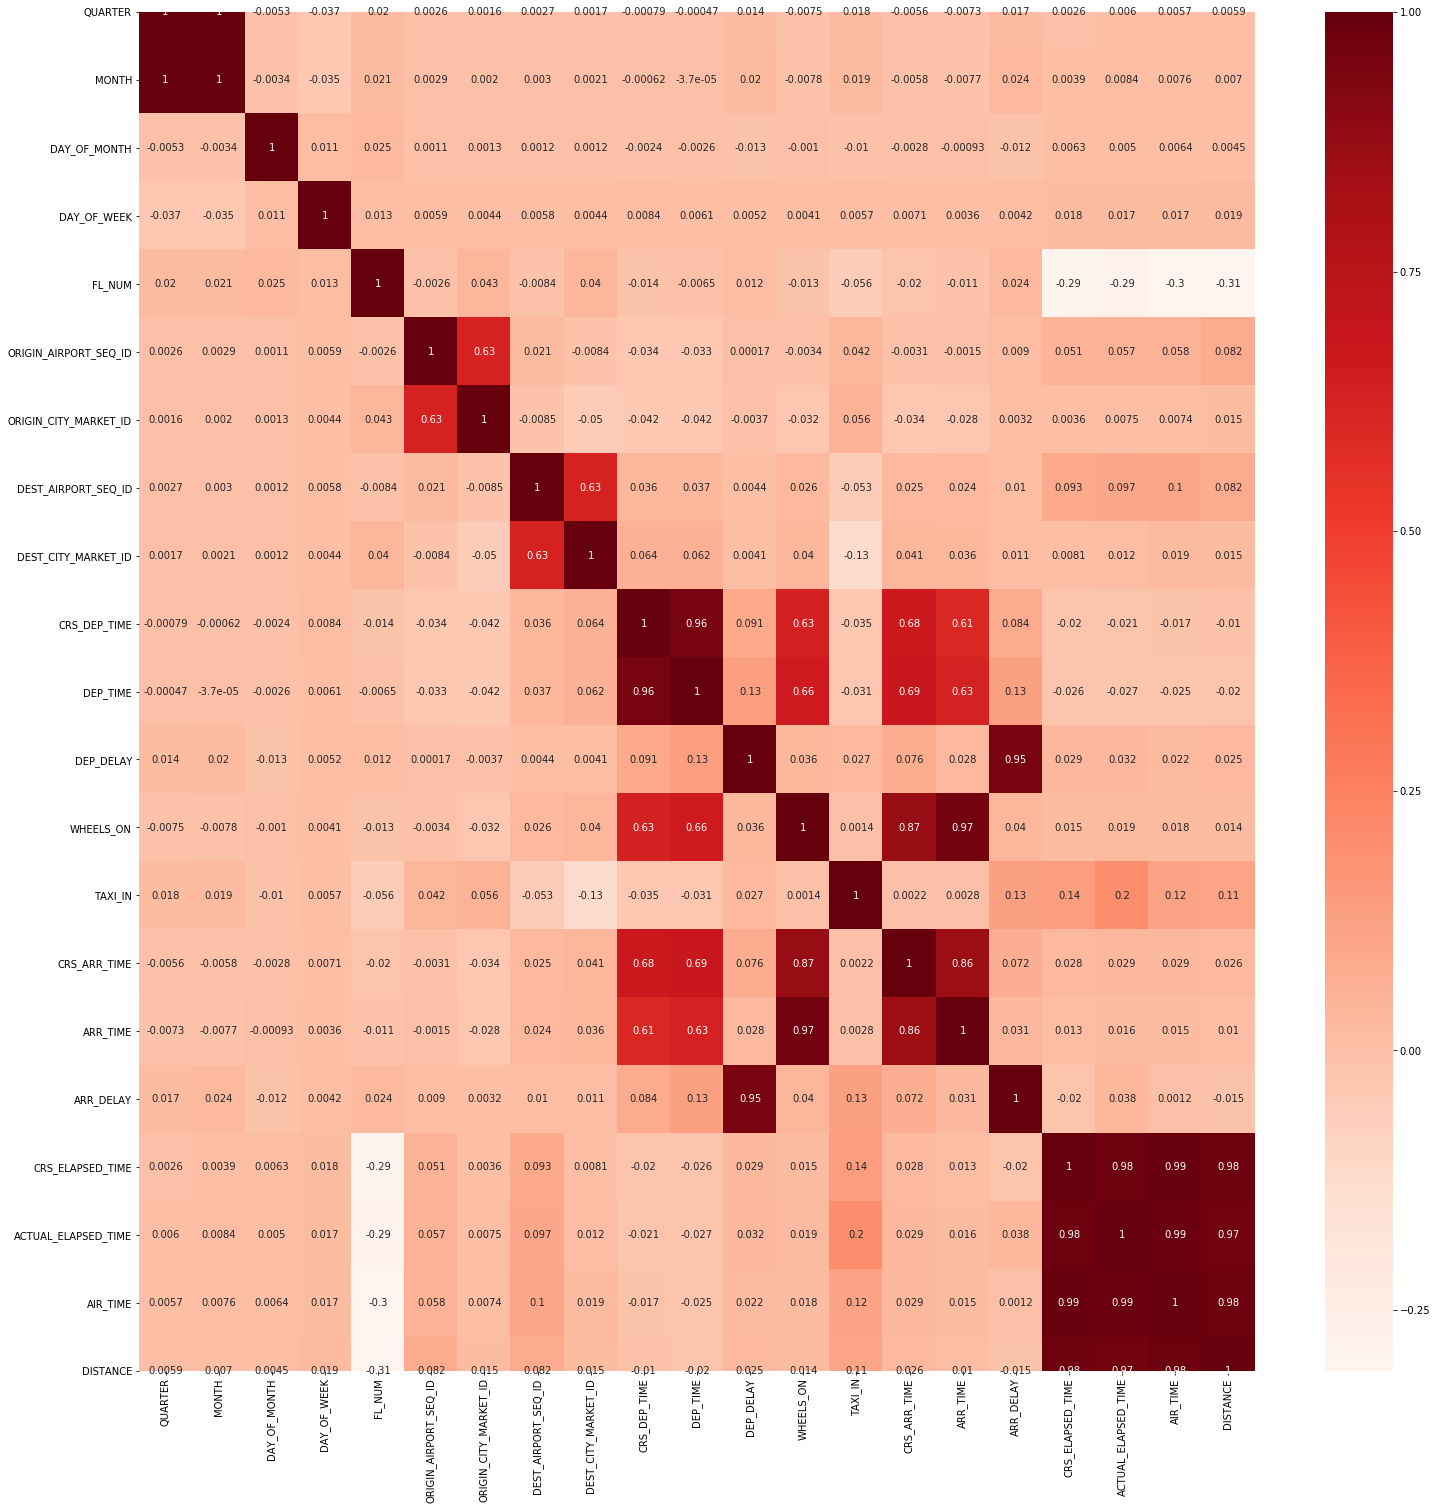

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

plt.figure(figsize=(25, 25))
cor = df_raw.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

See if any string type columns exist, which can be an nuisance for machine learning deployment.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856061 entries, 1 to 1856061
Data columns (total 43 columns):
QUARTER                  object
MONTH                    object
DAY_OF_MONTH             object
DAY_OF_WEEK              object
FL_DATE                  object
UNIQUE_CARRIER           object
FL_NUM                   object
ORIGIN_AIRPORT_ID        object
ORIGIN_AIRPORT_SEQ_ID    object
ORIGIN_CITY_MARKET_ID    object
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_NM          object
DEST_AIRPORT_ID          object
DEST_AIRPORT_SEQ_ID      object
DEST_CITY_MARKET_ID      object
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_NM            object
CRS_DEP_TIME             object
DEP_TIME                 object
DEP_DELAY                object
DEP_DELAY_NEW            object
WHEELS_ON                object
TAXI_IN                  object
CRS_ARR_TIME           

Any odd zero (0) values anywhere?

In [5]:
df_raw.eq(0).sum()

0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
FL_DATE                  0
UNIQUE_CARRIER           0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN_CITY_MARKET_ID    0
ORIGIN                   0
ORIGIN_CITY_NAME         0
ORIGIN_STATE_ABR         0
ORIGIN_STATE_NM          0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST_CITY_MARKET_ID      0
DEST                     0
DEST_CITY_NAME           0
DEST_STATE_ABR           0
DEST_STATE_NM            0
CRS_DEP_TIME             0
DEP_TIME                 0
DEP_DELAY                0
DEP_DELAY_NEW            0
WHEELS_ON                0
TAXI_IN                  0
CRS_ARR_TIME             0
ARR_TIME                 0
ARR_DELAY                0
ARR_DELAY_NEW            0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME      0
AIR_TIME                 0
FLIGHTS                  0
DISTANCE                 0
CARRIER_DELAY            0

Great! None. Next, check on how pervasive Not A Number (NaN), converted from null value in the original data source upon importation into Pandas, are.

In [6]:
# Show the propertion of NaN in each and every column
# isnull() is an alias for isna(), so better to use isna()
(df_raw.isna().sum()/df_raw.shape[0]) * 100

0
QUARTER                    0.000000
MONTH                      0.000000
DAY_OF_MONTH               0.000000
DAY_OF_WEEK                0.000000
FL_DATE                    0.000000
UNIQUE_CARRIER             0.000000
FL_NUM                     0.000000
ORIGIN_AIRPORT_ID          0.000000
ORIGIN_AIRPORT_SEQ_ID      0.000000
ORIGIN_CITY_MARKET_ID      0.000000
ORIGIN                     0.000000
ORIGIN_CITY_NAME           0.000000
ORIGIN_STATE_ABR           0.000000
ORIGIN_STATE_NM            0.000000
DEST_AIRPORT_ID            0.000000
DEST_AIRPORT_SEQ_ID        0.000000
DEST_CITY_MARKET_ID        0.000000
DEST                       0.000000
DEST_CITY_NAME             0.000000
DEST_STATE_ABR             0.000000
DEST_STATE_NM              0.000000
CRS_DEP_TIME               0.000000
DEP_TIME                   1.429048
DEP_DELAY                  1.429048
DEP_DELAY_NEW              1.429048
WHEELS_ON                  1.512019
TAXI_IN                    1.512019
CRS_ARR_TIME              

Take a note of the followings:

1. Unusually high number of NaNs in the last seven (7) columns! Most likely they possess much less predictive power.

In [7]:
df_raw.iloc[:,-7:]

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,Unnamed: 42
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,0.0,0.0,0.0,0.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,0.0,18.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1856057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856060,NaN,NaN,NaN,NaN,NaN,NaN,NaN


They don't look THAT relevant, don't they? We will drop them all.

In [8]:
df_raw.drop(df_raw.columns[-7:], axis=1, inplace=True)

2. DEP_TIME, DEP_DELAY and DEP_DELAY_NEW all have exactly the SAME 1.429048%, as well as WHEELS_ON, TAXI_IN and ARR_TIME (1.512019), and ARR_DELAY, ARR_DELAY_NEW, ACTUAL_ELAPSED_TIME and AIR_TIME (1.705655). Check if each and every row has NaN all across in a given set of columns.

In [9]:
print(df_raw[df_raw['DEP_TIME'].isna() & df_raw['DEP_DELAY'].isna() & df_raw['DEP_DELAY_NEW'].isna()].shape[0])
print(df_raw[df_raw['WHEELS_ON'].isna() & df_raw['TAXI_IN'].isna() & df_raw['ARR_TIME'].isna()].shape[0])
print(df_raw[df_raw['ARR_DELAY'].isna() & df_raw['ARR_DELAY_NEW'].isna() & df_raw['ACTUAL_ELAPSED_TIME'].isna() & df_raw['AIR_TIME'].isna()].shape[0])

26524
28064
31658


Let's count NaNs in each column just to make sure.

In [10]:
print("1. 'DEP_TIME' = {0}, 'DEP_DELAY' = {1} & 'DEP_DELAY_NEW' = {2}".format(df_raw['DEP_TIME'].isna().sum(), df_raw['DEP_DELAY'].isna().sum(), df_raw['DEP_DELAY_NEW'].isna().sum()))
print("2. 'WHEELS_ON' = {0}, 'TAXI_IN' = {1} & 'ARR_TIME' = {2}".format(df_raw['WHEELS_ON'].isna().sum(), df_raw['TAXI_IN'].isna().sum(), df_raw['ARR_TIME'].isna().sum()))
print("3. 'ARR_DELAY' = {0}, 'ARR_DELAY_NEW' = {1}, 'ACTUAL_ELAPSED_TIME' = {2} & 'AIR_TIME' = {3}".format(df_raw['ARR_DELAY'].isna().sum(), df_raw['ARR_DELAY_NEW'].isna().sum(), df_raw['ACTUAL_ELAPSED_TIME'].isna().sum(), df_raw['AIR_TIME'].isna().sum()))

1. 'DEP_TIME' = 26524, 'DEP_DELAY' = 26524 & 'DEP_DELAY_NEW' = 26524
2. 'WHEELS_ON' = 28064, 'TAXI_IN' = 28064 & 'ARR_TIME' = 28064
3. 'ARR_DELAY' = 31658, 'ARR_DELAY_NEW' = 31658, 'ACTUAL_ELAPSED_TIME' = 31658 & 'AIR_TIME' = 31658


From the above we can thus confidently eliminate info-redundant columns, i.e., leaving only one of those columns in each group.

The question is what COLUMN to drop. For example, 'DEP_DELAY' and 'DEP_DELAY_NEW' are roughly the same meaning, whereas 'DEP_TIME' could be completely a disparate variable. How do we know at this stage which one is more salient feature? Or, should we keep all the columns by just deleting rows with NaNs?

Let's check on all the rows with at least one NaN in it, in comparison with just the sum of all the rows in three different groups above.

In [11]:
all_nan_rows_count = df_raw[df_raw.isnull().any(axis=1)].shape[0]
all_groups_sum = df_raw['DEP_TIME'].isna().sum() + df_raw['WHEELS_ON'].isna().sum() + df_raw['ARR_DELAY'].isna().sum()
raw_data_count = df_raw.shape[0]

print("{0:,} ({1:.2%}) - total row count with NaNs".format(all_nan_rows_count, all_nan_rows_count/raw_data_count))
print(" vs. ")
print("{0:,} ({1:.2%}) - simple sum of rows with NaNs in all the separate groups".format(all_groups_sum, all_groups_sum/raw_data_count))

31,658 (1.71%) - total row count with NaNs
 vs. 
86,246 (4.65%) - simple sum of rows with NaNs in all the separate groups


The above means quite a few rows contain multiple NaNs and ultimately only 1.71% of the entire poulation include NaNs.

I feel it's astute to simply eliminate the rows with NaNs.

In [12]:
df_raw.dropna(how='any')

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
1,1,1,3,7,2016-01-03,F9,694,11292,1129202,30325,...,8.0,1820,1815.0,-5.0,0.0,115.0,111.0,87.0,1.0,692.0
2,1,1,3,7,2016-01-03,F9,809,14027,1402702,34027,...,8.0,929,948.0,19.0,19.0,269.0,244.0,224.0,1.0,1679.0
3,1,1,3,7,2016-01-03,F9,907,15356,1535602,35356,...,7.0,2015,2013.0,-2.0,0.0,90.0,75.0,60.0,1.0,373.0
4,1,1,3,7,2016-01-03,F9,908,14492,1449202,34492,...,7.0,2220,2215.0,-5.0,0.0,85.0,81.0,57.0,1.0,373.0
5,1,1,3,7,2016-01-03,F9,915,15356,1535602,35356,...,51.0,1420,1440.0,20.0,20.0,150.0,168.0,107.0,1.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856057,4,12,30,5,2016-12-30,DL,2034,11697,1169704,32467,...,6.0,716,711.0,-5.0,0.0,111.0,106.0,88.0,1.0,581.0
1856058,4,12,30,5,2016-12-30,DL,2035,10397,1039705,30397,...,7.0,1446,1449.0,3.0,3.0,124.0,128.0,105.0,1.0,669.0
1856059,4,12,30,5,2016-12-30,DL,2035,13342,1334205,33342,...,4.0,1845,1816.0,-29.0,0.0,137.0,105.0,89.0,1.0,669.0
1856060,4,12,30,5,2016-12-30,DL,2036,10397,1039705,30397,...,5.0,1302,1259.0,-3.0,0.0,107.0,102.0,71.0,1.0,515.0


## Outlier Elimination

Let's segregate into two (2) separate DataFrames: one to keep and the other to examine further on and after the 'DEP_TIME' column.

In [13]:
split_column_idx = df_raw.columns.get_loc('DEP_TIME')

df_keep = df_raw.iloc[:,:split_column_idx]
df_examine = df_raw.iloc[:,split_column_idx:]

In [14]:
df_examine.head()

,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
1,1524.0,-1.0,0.0,1807.0,8.0,1820,1815.0,-5.0,0.0,115.0,111.0,87.0,1.0,692.0
2,744.0,44.0,44.0,940.0,8.0,929,948.0,19.0,19.0,269.0,244.0,224.0,1.0,1679.0
3,1858.0,13.0,13.0,2006.0,7.0,2015,2013.0,-2.0,0.0,90.0,75.0,60.0,1.0,373.0
4,2054.0,-1.0,0.0,2208.0,7.0,2220,2215.0,-5.0,0.0,85.0,81.0,57.0,1.0,373.0
5,1252.0,2.0,2.0,1349.0,51.0,1420,1440.0,20.0,20.0,150.0,168.0,107.0,1.0,693.0


Need to conver 'object' to 'float' to run general arithmetic analysis.

In [15]:
pd.options.mode.chained_assignment = None  # default='warn'
# Chained indexing occurs whenever you use the indexers [], .loc, or .iloc twice in a row.
# Never use chained indexing to make an assignment, even changing data type as below.
# Chained indexing happens to pandas DataFrames/Series whenever two (or more) subset selections are created one after the other
#
# Otherwise the following warning appear
# /home/to/miniconda3/envs/us_flight_delay/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
#
# See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#   This is separate from the ipykernel package so we can avoid doing imports until
#
# Python doen't know what's intended to do; trying to experiment in a sliced view of DataFrame or really change the original data

for col in df_examine:
    df_examine[col] = df_examine[col].astype(float)
    # Alternatively, df_examine[col] = pd.to_numeric(df_examine[col], errors='coerce')

df_examine.describe()

,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
count,1.829537e+06,1.829537e+06,1.829537e+06,1.827997e+06,1.827997e+06,1.856061e+06,1.827997e+06,1.824403e+06,1.824403e+06,1.856058e+06,1.824403e+06,1.824403e+06,1856061.0,1.856061e+06
mean,1.334419e+03,9.812064e+00,1.267238e+01,1.471640e+03,7.562686e+00,1.494374e+03,1.476238e+03,4.206204e+00,1.259892e+01,1.463799e+02,1.408941e+02,1.169484e+02,1.0,8.523126e+02
std,5.004642e+02,4.166410e+01,4.064121e+01,5.270121e+02,6.047238e+00,5.133614e+02,5.314493e+02,4.389959e+01,4.031154e+01,7.673182e+01,7.587500e+01,7.374921e+01,0.0,6.198460e+02
min,1.000000e+00,-6.000000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.070000e+02,0.000000e+00,2.000000e+01,1.400000e+01,7.000000e+00,1.0,2.500000e+01
25%,9.200000e+02,-5.000000e+00,0.000000e+00,1.053000e+03,4.000000e+00,1.109000e+03,1.057000e+03,-1.400000e+01,0.000000e+00,9.000000e+01,8.400000e+01,6.200000e+01,1.0,3.910000e+02
50%,1.329000e+03,-2.000000e+00,0.000000e+00,1.510000e+03,6.000000e+00,1.522000e+03,1.514000e+03,-6.000000e+00,0.000000e+00,1.270000e+02,1.220000e+02,9.800000e+01,1.0,6.790000e+02
75%,1.741000e+03,7.000000e+00,7.000000e+00,1.914000e+03,9.000000e+00,1.920000e+03,1.919000e+03,7.000000e+00,7.000000e+00,1.790000e+02,1.740000e+02,1.480000e+02,1.0,1.096000e+03
max,2.400000e+03,2.040000e+03,2.040000e+03,2.400000e+03,2.500000e+02,2.359000e+03,2.400000e+03,2.028000e+03,2.028000e+03,7.050000e+02,7.780000e+02,7.230000e+02,1.0,4.983000e+03


Mmmm, numbers in scientific notation are much harder to grasp... Let's set float to 2 decimal points.

In [16]:
pd.options.display.float_format = '{:,.2f}'.format

In [17]:
df_examine.describe()

,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
count,"1,829,537.00","1,829,537.00","1,829,537.00","1,827,997.00","1,827,997.00","1,856,061.00","1,827,997.00","1,824,403.00","1,824,403.00","1,856,058.00","1,824,403.00","1,824,403.00","1,856,061.00","1,856,061.00"
mean,"1,334.42",9.81,12.67,"1,471.64",7.56,"1,494.37","1,476.24",4.21,12.60,146.38,140.89,116.95,1.00,852.31
std,500.46,41.66,40.64,527.01,6.05,513.36,531.45,43.90,40.31,76.73,75.87,73.75,0.00,619.85
min,1.00,-60.00,0.00,1.00,1.00,1.00,1.00,-107.00,0.00,20.00,14.00,7.00,1.00,25.00
25%,920.00,-5.00,0.00,"1,053.00",4.00,"1,109.00","1,057.00",-14.00,0.00,90.00,84.00,62.00,1.00,391.00
50%,"1,329.00",-2.00,0.00,"1,510.00",6.00,"1,522.00","1,514.00",-6.00,0.00,127.00,122.00,98.00,1.00,679.00
75%,"1,741.00",7.00,7.00,"1,914.00",9.00,"1,920.00","1,919.00",7.00,7.00,179.00,174.00,148.00,1.00,"1,096.00"
max,"2,400.00","2,040.00","2,040.00","2,400.00",250.00,"2,359.00","2,400.00","2,028.00","2,028.00",705.00,778.00,723.00,1.00,"4,983.00"


What's obvious is that the FLIGHTS column is populated 1 in every row, so we eliminate that.

In [18]:
# Every subset of Dataframes is a copy, NOT views, so modify the original df_raw, not df_examine.
df_raw.drop(['FLIGHTS'], axis=1, inplace=True)

Let's compare two techniques to remove outliers.

1. Tukey Fences, and
2. Z-Score

In [19]:
import numpy as np

def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((data > upper_bound) | (data < lower_bound))

dict_outliers = {}

for col in df_examine:
    dict_outliers[col] = outliers_iqr(df_examine[col])[0]

dict_outliers

{'DEP_TIME': array([], dtype=int64),
 'DEP_DELAY': array([], dtype=int64),
 'DEP_DELAY_NEW': array([], dtype=int64),
 'WHEELS_ON': array([], dtype=int64),
 'TAXI_IN': array([], dtype=int64),
 'CRS_ARR_TIME': array([], dtype=int64),
 'ARR_TIME': array([], dtype=int64),
 'ARR_DELAY': array([], dtype=int64),
 'ARR_DELAY_NEW': array([], dtype=int64),
 'CRS_ELAPSED_TIME': array([], dtype=int64),
 'ACTUAL_ELAPSED_TIME': array([], dtype=int64),
 'AIR_TIME': array([], dtype=int64),
 'FLIGHTS': array([], dtype=int64),
 'DISTANCE': array([     18,      43,      50, ..., 1855946, 1855991, 1856016])}

Mmm, the 'DISTANCE' column looks a bit fishy. The first output element of tupple prints row numbers in suspect. Check if they are truely atypical and out of normal.

In [24]:
dict_outliers['DISTANCE'].shape[0]

110999

In [25]:
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): # By default 60 and 20 respectively 
        display(df)

print("Possible outlier(s): {:,}".format(dict_outliers['DISTANCE'].shape[0]))
        
# Check on ORIGIN and DEST columns by displaying ALL the columns to see if those select flights are ledgit.
# https://www.airmilescalculator.com/distance/las-to-mia/ tells you its distance is indeed 2,174 miles. No problem.
display_all(df_raw.iloc[dict_outliers['DISTANCE'], :])

Possible outlier(s): 110,999


,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
19,1,1,3,7,2016-01-03,F9,1232,12889,1288903,32211,LAS,"Las Vegas, NV",NV,Nevada,13303,1330303,32467,MIA,"Miami, FL",FL,Florida,2315,2311.0,-4.0,0.0,628.0,9.0,645,637.0,-8.0,0.0,270.0,266.0,241.0,2174.0
44,1,1,3,7,2016-01-03,F9,1233,13303,1330303,32467,MIA,"Miami, FL",FL,Florida,12889,1288903,32211,LAS,"Las Vegas, NV",NV,Nevada,900,858.0,-2.0,0.0,1118.0,6.0,1140,1124.0,-16.0,0.0,340.0,326.0,303.0,2174.0
51,1,1,3,7,2016-01-03,F9,1180,12892,1289203,32575,LAX,"Los Angeles, CA",CA,California,13204,1320402,31454,MCO,"Orlando, FL",FL,Florida,2050,2043.0,-7.0,0.0,350.0,6.0,435,356.0,-39.0,0.0,285.0,253.0,230.0,2218.0
52,1,1,3,7,2016-01-03,F9,1181,13204,1320402,31454,MCO,"Orlando, FL",FL,Florida,12892,1289203,32575,LAX,"Los Angeles, CA",CA,California,1655,1651.0,-4.0,0.0,1930.0,12.0,1936,1942.0,6.0,6.0,341.0,351.0,317.0,2218.0
188,1,1,4,1,2016-01-04,F9,1180,12892,1289203,32575,LAX,"Los Angeles, CA",CA,California,13204,1320402,31454,MCO,"Orlando, FL",FL,Florida,2050,2040.0,-10.0,0.0,400.0,8.0,435,408.0,-27.0,0.0,285.0,268.0,249.0,2218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855920,4,12,30,5,2016-12-30,DL,1901,10397,1039705,30397,ATL,"Atlanta, GA",GA,Georgia,14747,1474703,30559,SEA,"Seattle, WA",WA,Washington,1530,1529.0,-1.0,0.0,1758.0,3.0,1806,1801.0,-5.0,0.0,336.0,332.0,315.0,2182.0
1855924,4,12,30,5,2016-12-30,DL,1905,12173,1217302,32134,HNL,"Honolulu, HI",HI,Hawaii,14747,1474703,30559,SEA,"Seattle, WA",WA,Washington,1359,1353.0,-6.0,0.0,2129.0,7.0,2149,2136.0,-13.0,0.0,350.0,343.0,321.0,2677.0
1855947,4,12,30,5,2016-12-30,DL,1929,10397,1039705,30397,ATL,"Atlanta, GA",GA,Georgia,14747,1474703,30559,SEA,"Seattle, WA",WA,Washington,810,816.0,6.0,6.0,1108.0,30.0,1046,1138.0,52.0,52.0,336.0,382.0,316.0,2182.0
1855992,4,12,30,5,2016-12-30,DL,1973,13830,1383002,33830,OGG,"Kahului, HI",HI,Hawaii,12892,1289204,32575,LAX,"Los Angeles, CA",CA,California,1355,1354.0,-1.0,0.0,2043.0,11.0,2130,2054.0,-36.0,0.0,335.0,300.0,275.0,2486.0


After close examination, they all seem to legit. Now move onto Z-Scores, which identify any data points by 3 standard deviations either side from mean, i.e., < -3 Stdev and < 3 Stdev.

In [37]:
def outliers_z_score(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    return np.where(np.abs(z_scores) > threshold)

dict_outliers_z_score = {}

for col in df_examine:
    dict_outliers_z_score[col] = outliers_z_score(df_examine[col])[0]
    print(col, np.isnan(np.sum(df_examine[col])))
dict_outliers_z_score

# RuntimeWarning: invalid value encountered in greater
#  
# RuntimeWarning: invalid value encountered in double_scalars
#  This happens because a division result can be very miniscule, close to zero at '(y - mean) / std'

/home/to/miniconda3/envs/us_flight_delay/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


DEP_TIME False
DEP_DELAY False
DEP_DELAY_NEW False
WHEELS_ON False
TAXI_IN False
CRS_ARR_TIME False
ARR_TIME False
ARR_DELAY False
ARR_DELAY_NEW False
CRS_ELAPSED_TIME False
ACTUAL_ELAPSED_TIME False
AIR_TIME False


/home/to/miniconda3/envs/us_flight_delay/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


FLIGHTS False
DISTANCE False


{'DEP_TIME': array([], dtype=int64),
 'DEP_DELAY': array([    320,     324,     338, ..., 1855276, 1855707, 1855909]),
 'DEP_DELAY_NEW': array([    320,     324,     338, ..., 1855276, 1855707, 1855909]),
 'WHEELS_ON': array([], dtype=int64),
 'TAXI_IN': array([      4,      22,      30, ..., 1855855, 1855946, 1855994]),
 'CRS_ARR_TIME': array([], dtype=int64),
 'ARR_TIME': array([], dtype=int64),
 'ARR_DELAY': array([    320,     324,     338, ..., 1855276, 1855707, 1855909]),
 'ARR_DELAY_NEW': array([    320,     324,     338, ..., 1855276, 1855707, 1855909]),
 'CRS_ELAPSED_TIME': array([   3887,    3888,    3889, ..., 1855330, 1855633, 1855754]),
 'ACTUAL_ELAPSED_TIME': array([   3887,    3888,    3889, ..., 1855330, 1855633, 1855946]),
 'AIR_TIME': array([   3887,    3888,    3889, ..., 1855330, 1855633, 1855754]),
 'FLIGHTS': array([], dtype=int64),
 'DISTANCE': array([   3887,    3888,    3889, ..., 1850596, 1855224, 1855633])}

In [36]:
for key, value in dict_outliers_z_score.items():
    if value.shape[0] != 0:
        print("{0}:  {1}".format(key, dict_outliers_z_score[key].shape[0]))

DEP_DELAY:  33421
DEP_DELAY_NEW:  33421
TAXI_IN:  33997
ARR_DELAY:  32193
ARR_DELAY_NEW:  33192
CRS_ELAPSED_TIME:  22187
ACTUAL_ELAPSED_TIME:  21507
AIR_TIME:  20837
DISTANCE:  7125


The question here is "Are they really considered to be anomaly?" Probably not, as they could be ultra-long flights together with very short flights, let alone, delay time, taxi time, etc.,. I conclude the process right here.

We will save this curated raw data for further analysis.

In [42]:
import os

os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/df_raw_curated')

ValueError: feather does not support serializing a non-default index for the index; you can .reset_index() to make the index into column(s)

In [45]:
df_raw.reset_index(drop=True, inplace=True)

In [46]:
# Try again!
df_raw.to_feather('tmp/df_raw_curated')